----

# Proyecto 9 - Luis G

In [ ]:
# Importar librerias

import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [74]:
# Importar datasets

visits = pd.read_csv("visits_log_us.csv")
orders = pd.read_csv("orders_log_us.csv")
costs = pd.read_csv("costs_us.csv")

## Diagnóstico inicial

In [75]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [76]:
visits.sample(10)

,Device,End Ts,Source Id,Start Ts,Uid
213527,desktop,2017-06-08 16:58:00,3,2017-06-08 16:51:00,9778759032831599646
165943,desktop,2017-10-26 09:44:00,5,2017-10-26 09:25:00,851331749833568480
308099,desktop,2018-01-23 16:13:00,3,2018-01-23 16:13:00,9148083352951863439
128618,desktop,2017-10-03 21:05:00,3,2017-10-03 21:01:00,11712019023479170965
141190,desktop,2018-03-29 19:30:00,1,2018-03-29 19:23:00,2500322121796083346
232258,desktop,2018-02-25 13:28:00,4,2018-02-25 13:26:00,15811018775608308125
57249,desktop,2017-12-06 15:31:00,2,2017-12-06 15:22:00,12487512507465509579
235516,desktop,2017-12-03 22:03:00,2,2017-12-03 22:02:00,2716861456763275846
83423,touch,2017-10-19 22:13:00,4,2017-10-19 22:07:00,3876587144473739020
117065,touch,2018-05-23 10:40:00,2,2018-05-23 10:39:00,10246903932085021612


In [77]:
# Cambiar los nombres de las columnas al formato snakecase

visits.columns = [col.lower().replace(" ", "_") for col in visits.columns]

# Cambiar las columnas de tiempo a formato datetime

visits['end_ts'] = pd.to_datetime(visits['end_ts'], format="%Y-%m-%d %H:%M:%S")
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format="%Y-%m-%d %H:%M:%S")

# Extraer columnas para año, mes y día de cada inicio de visita

visits['start_year'] = visits['start_ts'].dt.year
visits['start_month'] = visits['start_ts'].dt.month
visits['start_day'] = visits['start_ts'].dt.day

visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   device       359400 non-null  object        
 1   end_ts       359400 non-null  datetime64[ns]
 2   source_id    359400 non-null  int64         
 3   start_ts     359400 non-null  datetime64[ns]
 4   uid          359400 non-null  uint64        
 5   start_year   359400 non-null  int32         
 6   start_month  359400 non-null  int32         
 7   start_day    359400 non-null  int32         
dtypes: datetime64[ns](2), int32(3), int64(1), object(1), uint64(1)
memory usage: 17.8+ MB


In [78]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [79]:
orders.sample(10)

,Buy Ts,Revenue,Uid
2035,2017-06-26 14:40:00,4.89,15830354360453248394
18943,2017-11-23 12:36:00,1.71,15606754459276252517
38768,2018-03-07 15:28:00,3.67,13815758212351098127
24245,2017-12-15 14:38:00,5.55,7722596498905250132
48374,2018-05-22 00:17:00,0.61,6971449871994560458
10727,2017-10-05 08:02:00,1.53,11898965182851045636
46354,2018-05-04 19:16:00,3.36,1459765523422603116
12837,2017-10-15 08:38:00,3.05,16113422499635515995
32325,2018-02-01 12:59:00,0.85,9325754131594430324
23239,2017-12-10 20:02:00,1.65,17221583029717421192


In [80]:
# Cambiar columnas al formato snakecase

orders.columns = [col.lower().replace(' ', '_') for col in orders.columns]

# Cambiar a formato datetime la columna buy ts

orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format="%Y-%m-%d %H:%M:%S")

# Extraer año, mes y día de la columa buy_ts

orders['buy_year'] = orders['buy_ts'].dt.year
orders['buy_month'] = orders['buy_ts'].dt.month
orders['buy_day'] = orders['buy_ts'].dt.day

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   buy_ts     50415 non-null  datetime64[ns]
 1   revenue    50415 non-null  float64       
 2   uid        50415 non-null  uint64        
 3   buy_year   50415 non-null  int32         
 4   buy_month  50415 non-null  int32         
 5   buy_day    50415 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(3), uint64(1)
memory usage: 1.7 MB


In [81]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [82]:
costs.sample(10)

,source_id,dt,costs
728,3,2017-06-03,196.12
2292,10,2017-09-22,23.06
1304,4,2018-01-02,281.71
1416,4,2018-04-26,346.00
1114,4,2017-06-26,45.00
1970,9,2017-11-02,26.58
624,2,2018-02-17,177.42
1056,3,2018-04-29,135.33
1186,4,2017-09-06,263.13
310,1,2018-04-09,21.56


In [83]:
# Cambiar columna dt a datetime

costs['dt'] = pd.to_datetime(costs['dt'], format="%Y-%m-%d")

# Extraer año, mes y día

costs['year'] = costs['dt'].dt.year
costs['month'] = costs['dt'].dt.month
costs['day'] = costs['dt'].dt.day

costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
 3   year       2542 non-null   int32         
 4   month      2542 non-null   int32         
 5   day        2542 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(3), int64(1)
memory usage: 89.5 KB


## Exploración de datos

### Visits

- ¿Cuántas personas lo usan cada día, semana y mes?
- ¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).
- ¿Cuál es la duración de cada sesión?
- ¿Con qué frecuencia los usuarios regresan?

In [84]:
# Tabla para mostrar los usuarios únicos por día, agrupados por año y mes.

visits_freq = visits.pivot_table(
    index='start_day',
    columns=['start_year','start_month'],
    values='uid',
    aggfunc='nunique'

)

visits_freq.columns=['JUN 2017','JUL 2017', 'AUG 2017', 'SEP 2017', 'OCT 2017','NOV 2017', 'DIC 2017','JAN 2018','FEB 2018','MAR 2018','ABR 2018','MAY 2018']
visits_freq


,JUN 2017,JUL 2017,AUG 2017,SEP 2017,OCT 2017,NOV 2017,DIC 2017,JAN 2018,FEB 2018,MAR 2018,ABR 2018,MAY 2018
start_day,,,,,,,,,,,,
1,605.0,361.0,410.0,572.0,848.0,1237.0,1273.0,992.0,1640.0,1166.0,NaN,489.0
2,608.0,330.0,360.0,472.0,1146.0,1168.0,1040.0,1265.0,1378.0,1253.0,641.0,496.0
3,445.0,594.0,397.0,499.0,1190.0,1144.0,1185.0,1219.0,1045.0,962.0,942.0,803.0
4,476.0,511.0,347.0,654.0,1232.0,943.0,1432.0,1260.0,1007.0,1029.0,938.0,745.0
5,820.0,519.0,280.0,728.0,1226.0,1009.0,1458.0,1006.0,1256.0,1209.0,912.0,565.0
6,797.0,578.0,282.0,777.0,1418.0,1047.0,1377.0,915.0,1200.0,1213.0,911.0,580.0
7,699.0,542.0,414.0,782.0,1117.0,1240.0,1524.0,831.0,1250.0,1311.0,730.0,711.0
8,868.0,389.0,388.0,832.0,901.0,1201.0,1411.0,903.0,1417.0,1025.0,729.0,609.0
9,695.0,444.0,394.0,511.0,1257.0,1149.0,1077.0,1128.0,1294.0,984.0,958.0,441.0


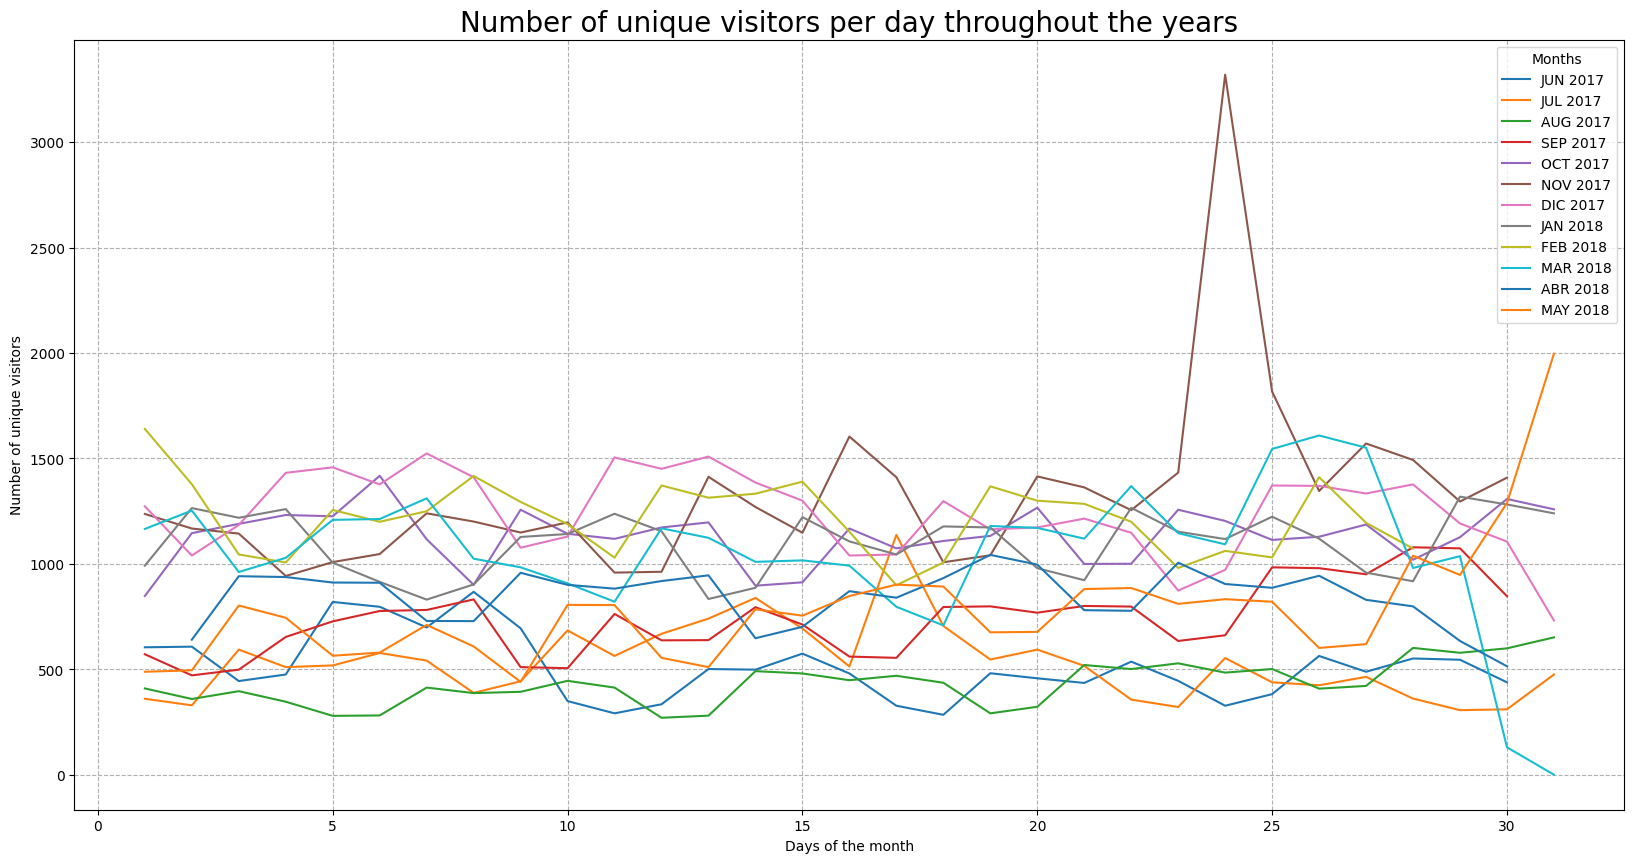

In [85]:
# Vista general de las visitas dentro del periodo de los datos

visits_freq.plot(kind='line', 
                 figsize=(20,10),
                 xlabel='Days of the month',
                 ylabel='Number of unique visitors'
                 
                 
                 )

plt.title('Number of unique visitors per day throughout the years', fontsize=20)
plt.grid(linestyle='--')
plt.legend(title='Months')
plt.show()

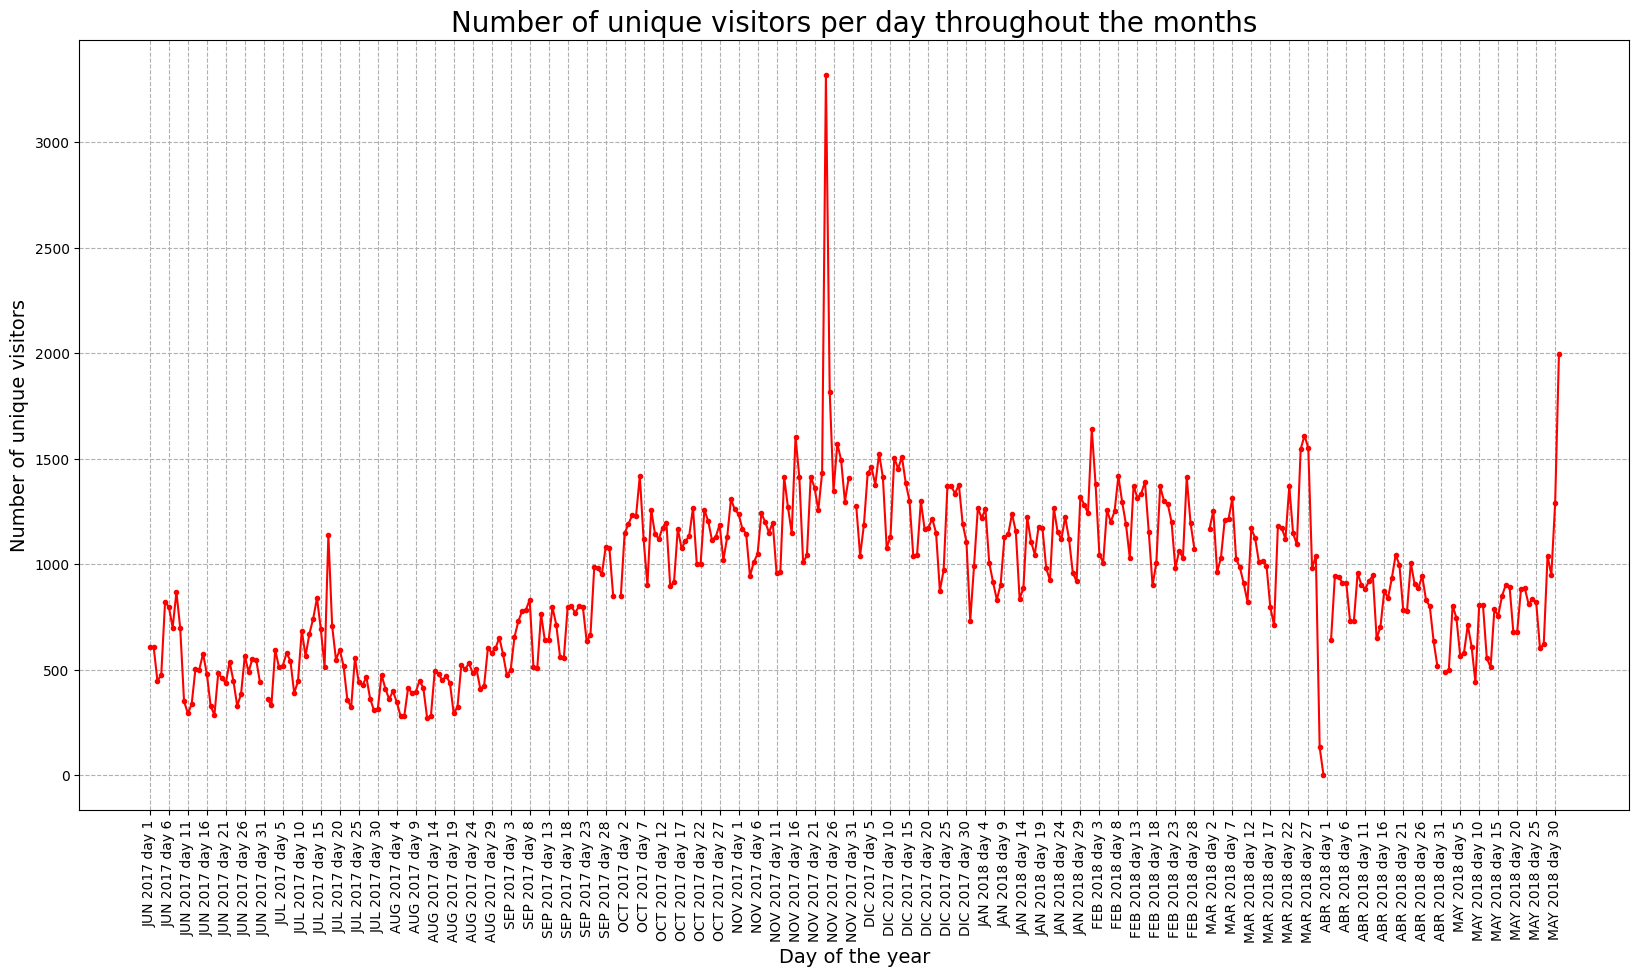

In [86]:
# Gráfico con eje x desglosado por día

visits_freq_reset = visits_freq.reset_index()
visits_long = visits_freq_reset.melt(id_vars='start_day', 
                                     var_name='month', 
                                     value_name='visits')

visits_long['date'] = visits_long['month'] + ' day ' + visits_long['start_day'].astype(str)

# Graficar
plt.figure(figsize=(20,10))
plt.plot(visits_long['date'], visits_long['visits'], marker='.', color='red')

plt.xlabel('Day of the year', fontsize=14)
plt.ylabel('Number of unique visitors', fontsize=14)
plt.title('Number of unique visitors per day throughout the months', fontsize=20)
plt.grid(linestyle='--')

# Mostrar solo cada 5 días
step = 5
positions = range(len(visits_long['date']))
plt.xticks(positions[::step], visits_long['date'][::step], rotation=90)

plt.show()

Alrededor del 24 de noviembre 2017 encontramos un pico en las visitas, coincidiendo con nuestra hipótesis de un evento importante cercano a fin de año.

- No contamos con datos el primer día de abril de 2018, ¿quizá la plataforma no estuvo funcionando ese día? O quizá, ¿hubo un bug con el sistema de reportería?
- Podríamos colocar el valor de la media de esa columna, pero quizá no nos afecte al análisis entonces lo dejaremos así por ahora.

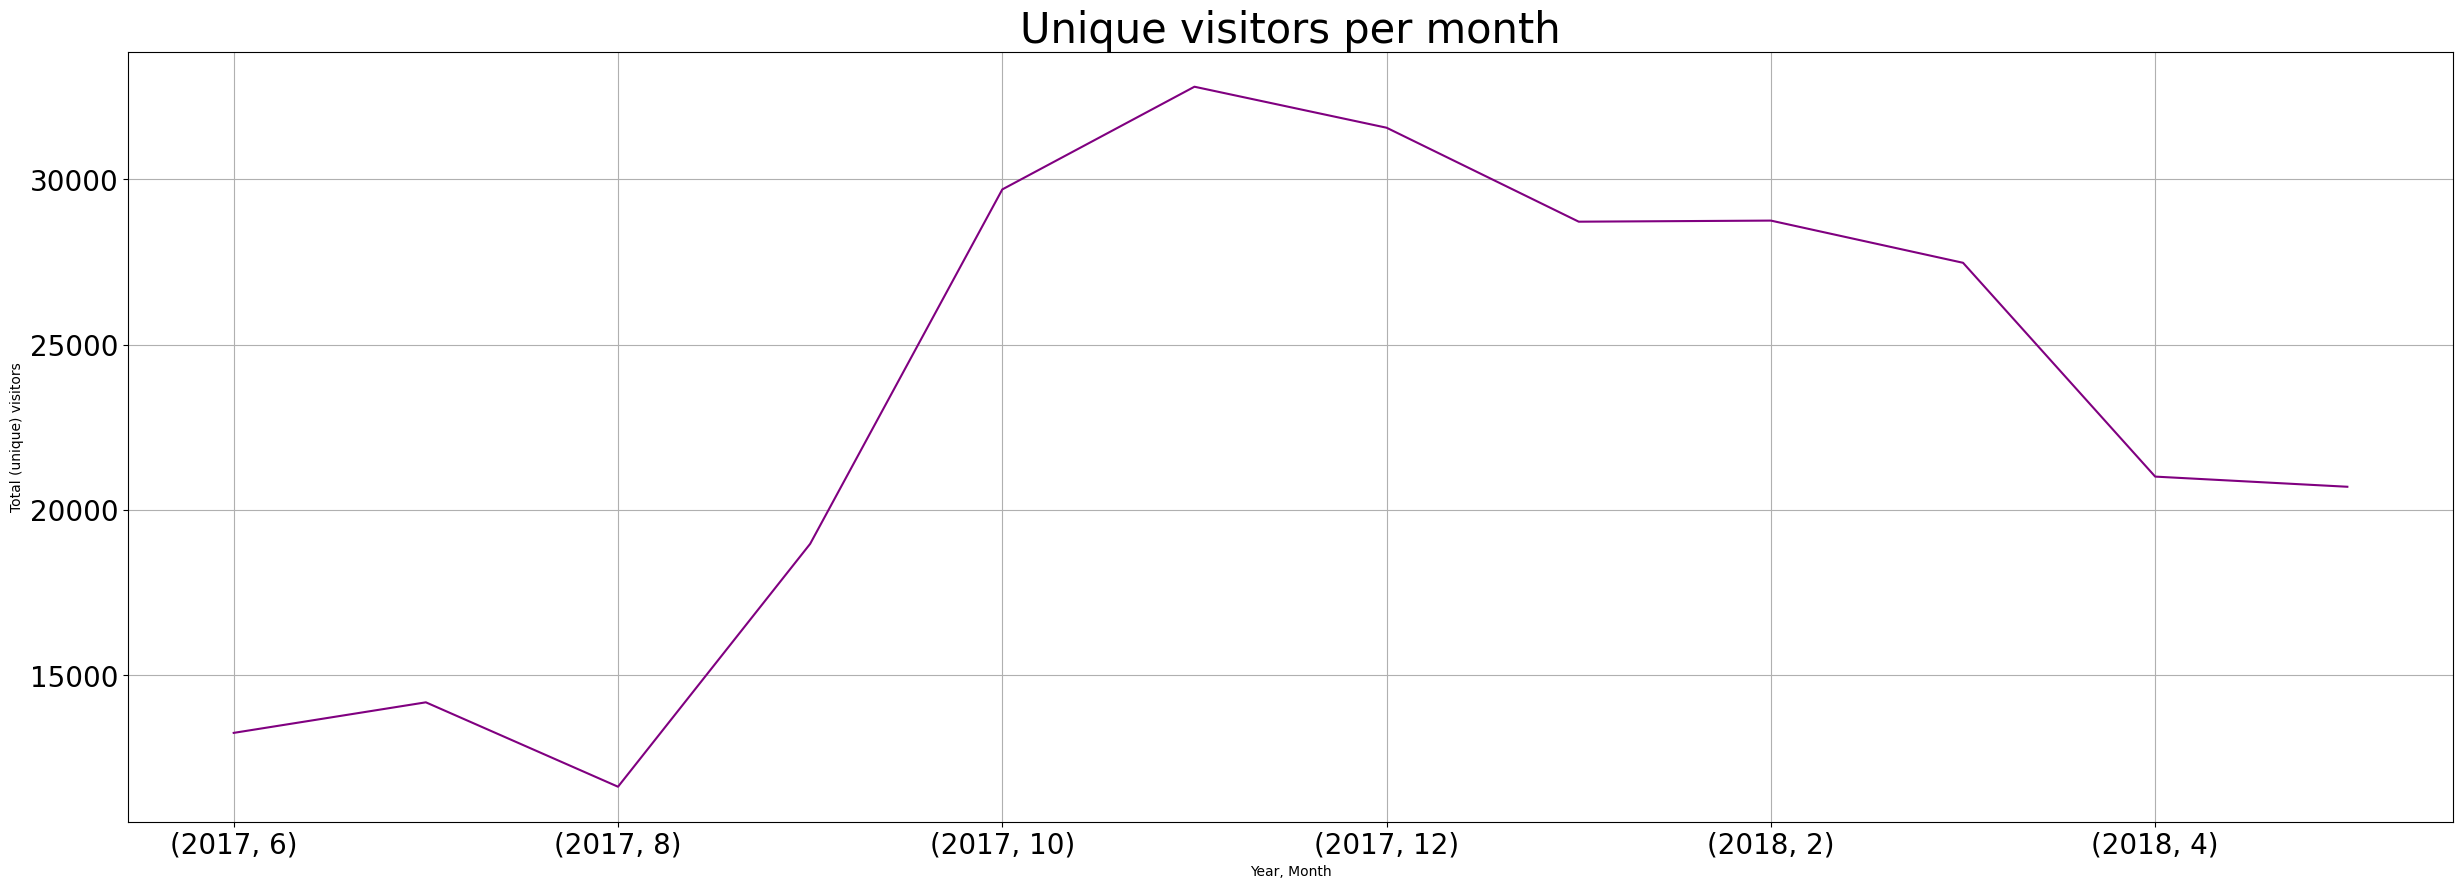

In [87]:
# Visualizar la actividad de usuarios únicos en todo el dataset, agrupados por mes y año.

visits_both_years = visits.groupby(['start_year', 'start_month'])['uid'].nunique()

visits_both_years.plot(
    kind='line', 
    figsize=[30,10],
    xlabel='Year, Month',
    ylabel='Total (unique) visitors',
    grid='gray',
    color='purple',
    fontsize=20
)

plt.title('Unique visitors per month', fontsize=30)
plt.show()

- Observamos con las visualizaciones que los periodos donde más se utiliza el servicio son a finales de año, con tendencia a tener poco tráfico durante la mitad del año.
- ¿Podría ser que a mediados de año no hay tantos shows o bien, los que hay, a la gente no les interesa tanto?
- Durante 2017 se puede observar que hay menos gente en general usando la plataforma, desconocemos si apenas lanzaron esta plataforma y por eso las visitas poco a poco van creciendo conforme pasan los años.

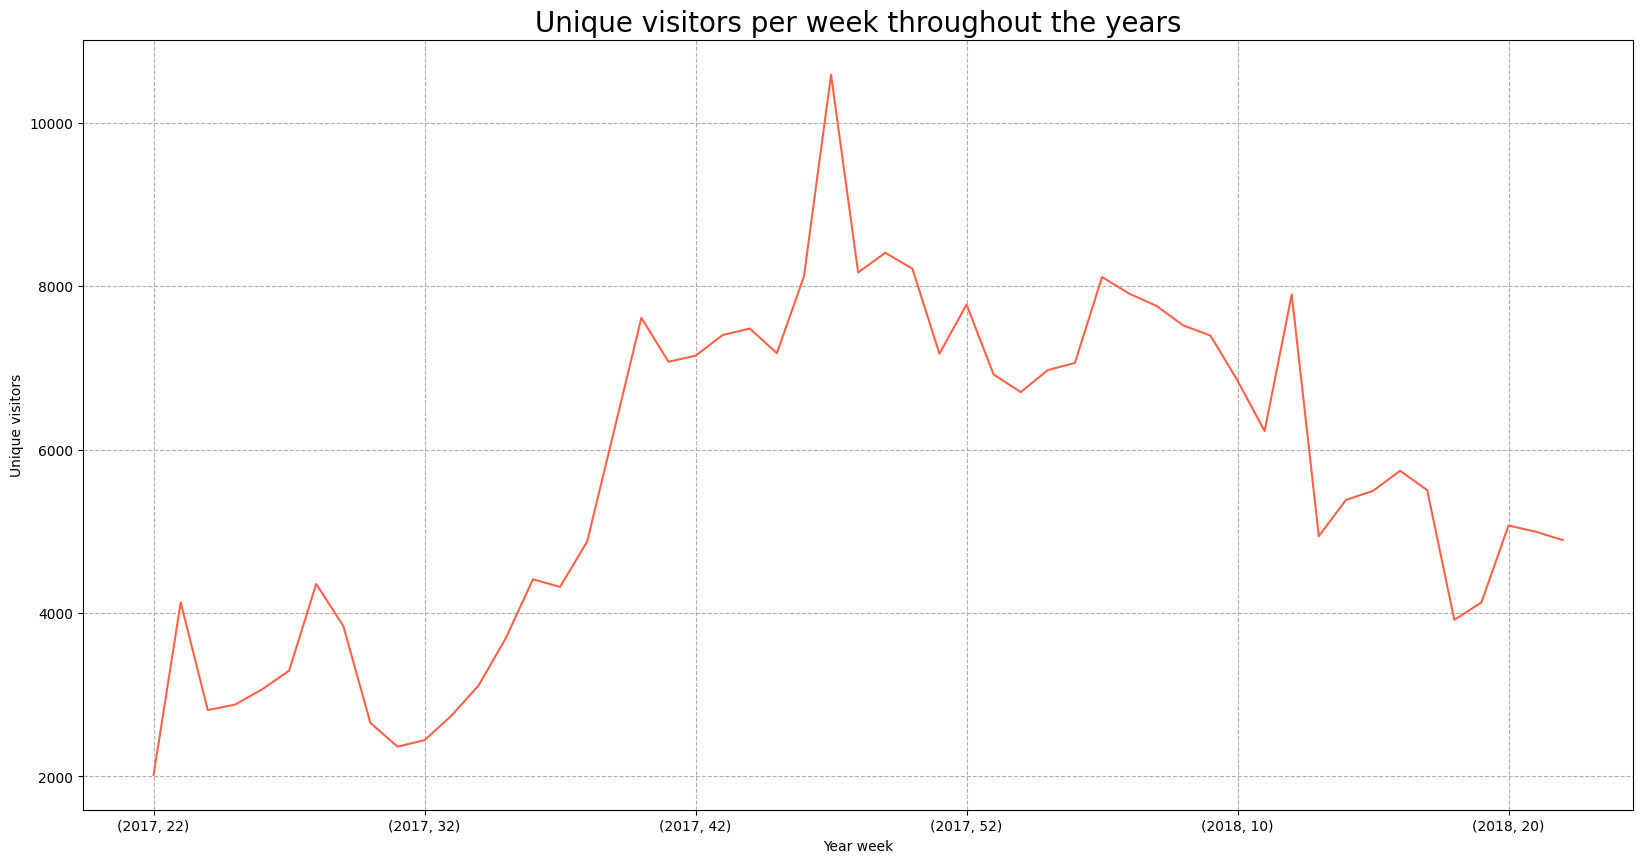

In [88]:
# Creación de la columna de semana del año

visits['start_week'] = visits['start_ts'].dt.isocalendar().week
visits_per_week = visits.groupby(['start_year','start_week'])['uid'].nunique()

#Generar gráfico de usuarios únicos semanales

visits_per_week.plot(kind='line',
                     figsize=(20,10),
                     xlabel= 'Year week',
                     ylabel='Unique visitors',
                     color='tomato'
                     
                     )

plt.grid(linestyle='--')
plt.title('Unique visitors per week throughout the years', fontsize=20)
plt.show()

In [89]:
# Sesiones totales por día

visits_total_sessions = visits.pivot_table(
    index='start_day',
    columns=['start_year','start_month'],
    values='uid',
    aggfunc='count'
)

visits_total_sessions.columns=['JUN 2017','JUL 2017', 'AUG 2017', 'SEP 2017', 'OCT 2017','NOV 2017', 'DIC 2017','JAN 2018','FEB 2018','MAR 2018','ABR 2018','MAY 2018']

In [90]:
visits_total_sessions.describe()

,JUN 2017,JUL 2017,AUG 2017,SEP 2017,OCT 2017,NOV 2017,DIC 2017,JAN 2018,FEB 2018,MAR 2018,ABR 2018,MAY 2018
count,30.000000,31.000000,31.000000,30.000000,31.000000,30.000000,31.000000,31.000000,28.000000,31.000000,29.000000,31.000000
mean,550.166667,575.096774,463.064516,796.900000,1222.677419,1465.633333,1354.290323,1191.580645,1327.928571,1150.935484,914.310345,859.193548
std,169.767607,200.054885,112.764041,187.176912,149.840446,551.505431,221.998678,163.102989,199.601998,372.980959,146.941948,330.116083
min,306.000000,331.000000,293.000000,494.000000,895.000000,987.000000,784.000000,884.000000,986.000000,1.000000,549.000000,464.000000
25%,465.500000,435.500000,396.000000,675.000000,1174.000000,1224.250000,1204.000000,1052.500000,1135.250000,1070.500000,828.000000,654.000000
50%,522.000000,554.000000,444.000000,823.000000,1235.000000,1356.000000,1400.000000,1238.000000,1331.500000,1189.000000,965.000000,858.000000
75%,608.250000,632.500000,527.500000,882.750000,1322.500000,1546.250000,1530.000000,1321.000000,1471.250000,1315.500000,1012.000000,943.000000
max,939.000000,1278.000000,708.000000,1184.000000,1556.000000,4042.000000,1670.000000,1432.000000,1878.000000,1796.000000,1135.000000,2256.000000


- Podemos observar que durante el mes de noviembre de 2017 fue cuando existió el pico de tráfico más grande de todo el dataset, alcanzando 4042 visitas.
- No contamos con un calendario de los eventos de la plataforma, pero quizá hubo un artista o presentación muy esperado por la gente anunciado durante ese mes.
- Encontramos que en Marzo de 2018 tenemos un día donde solamente hubo 1 visita, deberíamos sospechar de ese dato.

In [91]:
# Marzo 2018 - El 31 de marzo encontramos un posible error de plataforma.

visits_total_sessions.loc[0:,'MAR 2018']

start_day
1     1280.0
2     1374.0
3     1041.0
4     1093.0
5     1328.0
6     1344.0
7     1423.0
8     1112.0
9     1072.0
10     984.0
11     884.0
12    1293.0
13    1244.0
14    1108.0
15    1134.0
16    1081.0
17     856.0
18     773.0
19    1303.0
20    1275.0
21    1223.0
22    1467.0
23    1233.0
24    1189.0
25    1703.0
26    1796.0
27    1734.0
28    1069.0
29    1128.0
30     134.0
31       1.0
Name: MAR 2018, dtype: float64

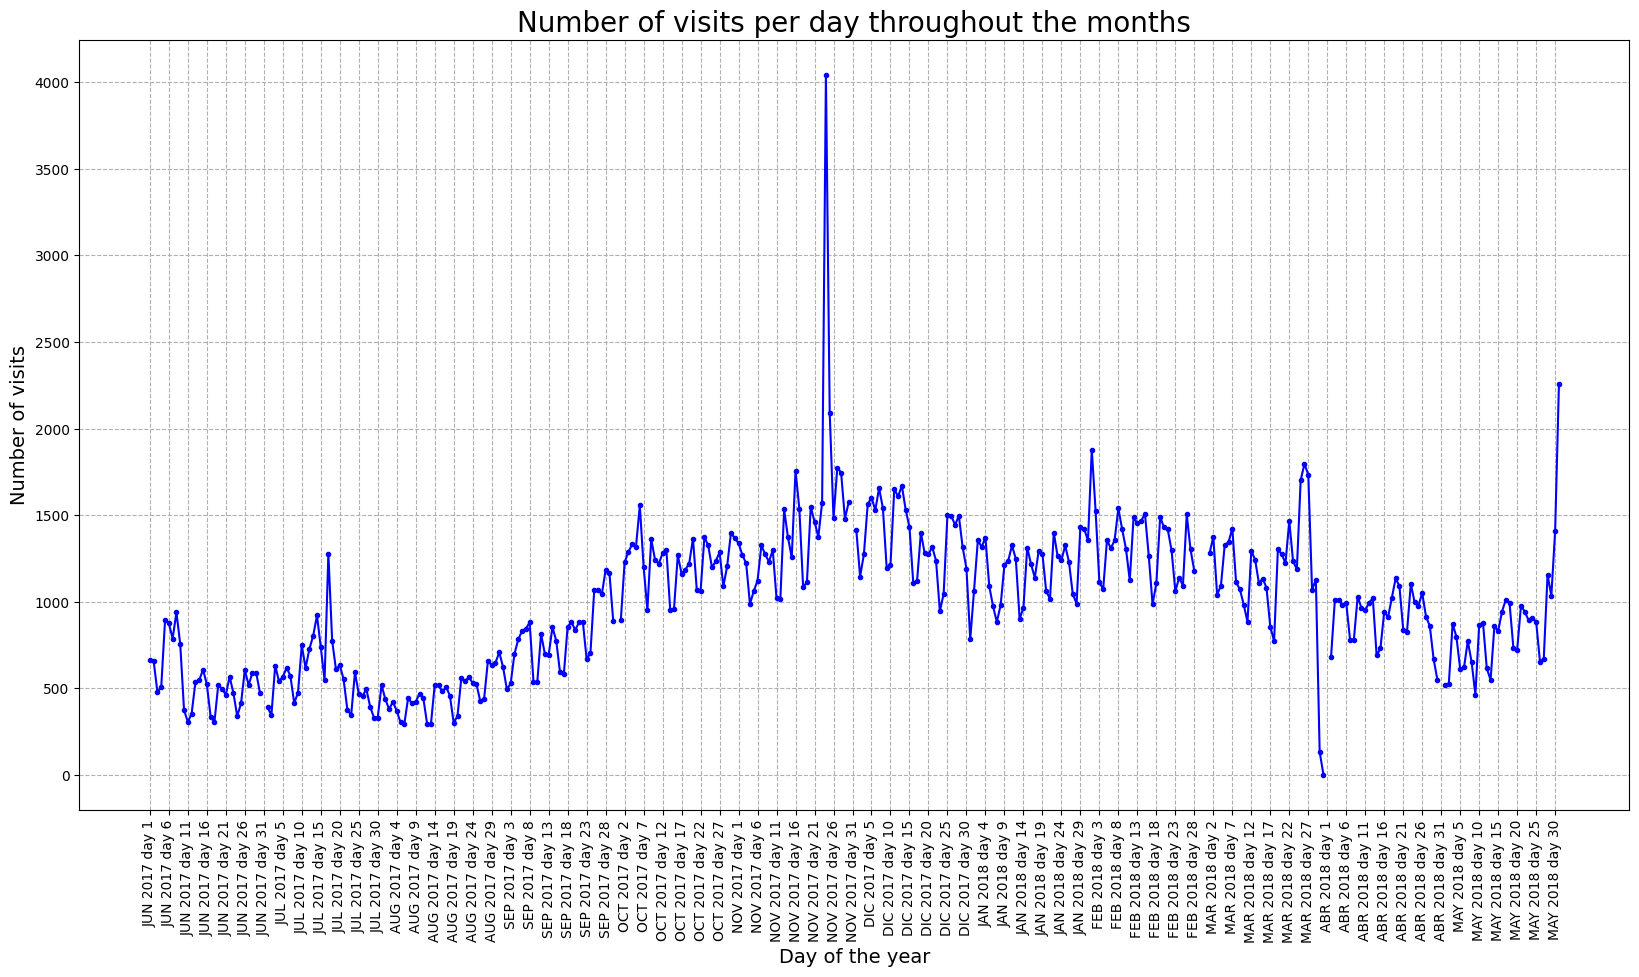

In [92]:
# Gráfico con eje x desglosado por día

visits_total_sessions_reset = visits_total_sessions.reset_index()
visits_total_long = visits_total_sessions_reset.melt(id_vars='start_day', 
                                     var_name='month', 
                                     value_name='visits')

visits_total_long['date'] = visits_total_long['month'] + ' day ' + visits_total_long['start_day'].astype(str)

# Graficar
plt.figure(figsize=(20,10))
plt.plot(visits_total_long['date'], visits_total_long['visits'], marker='.', color='blue')

plt.xlabel('Day of the year', fontsize=14)
plt.ylabel('Number of visits', fontsize=14)
plt.title('Number of visits per day throughout the months', fontsize=20)
plt.grid(linestyle='--')

# Mostrar solo cada 5 días
step = 5
positions = range(len(visits_total_long['date']))
plt.xticks(positions[::step], visits_total_long['date'][::step], rotation=90)

plt.show()

In [93]:
# Duración de cada sesión

visits['session_duration'] = visits['end_ts'] - visits['start_ts']

visits['session_duration'].describe() # Encontramos un valor mínimo imposible de -1 día

count                       359400
mean     0 days 00:10:43.025687256
std      0 days 00:16:37.127760516
min              -1 days +23:14:00
25%                0 days 00:02:00
50%                0 days 00:05:00
75%                0 days 00:14:00
max                0 days 11:51:00
Name: session_duration, dtype: object

In [94]:
# Detección de casos erróneos en tiempo de sesión

impossible_cases = visits[visits['session_duration'] < np.timedelta64(0)]
impossible_cases

,device,end_ts,source_id,start_ts,uid,start_year,start_month,start_day,start_week,session_duration
4181,desktop,2018-03-25 03:18:00,3,2018-03-25 03:50:00,13092152539246794986,2018,3,25,12,-1 days +23:28:00
177972,desktop,2018-03-25 03:09:00,9,2018-03-25 03:55:00,4621202742905035453,2018,3,25,12,-1 days +23:14:00


- Una vez más, encontramos un problema con Marzo de 2018, si bien no parece ser grave, tendríamos que empezar a dudar sobre la recolección de data de ese mes en particular, pues parece que algo estaba fallando en la reportería.
- De no ser así, quizá no se toma en cuenta las zonas horarias correctamente y por eso existen esos errores de tiempos de inicio de sesión más grandes que los de fin de sesión.

In [95]:
# Retiramos casos erróneos del dataframe original

visits = visits[visits['session_duration'] >= np.timedelta64(0)].reset_index(drop=True)

visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359398 entries, 0 to 359397
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype          
---  ------            --------------   -----          
 0   device            359398 non-null  object         
 1   end_ts            359398 non-null  datetime64[ns] 
 2   source_id         359398 non-null  int64          
 3   start_ts          359398 non-null  datetime64[ns] 
 4   uid               359398 non-null  uint64         
 5   start_year        359398 non-null  int32          
 6   start_month       359398 non-null  int32          
 7   start_day         359398 non-null  int32          
 8   start_week        359398 non-null  UInt32         
 9   session_duration  359398 non-null  timedelta64[ns]
dtypes: UInt32(1), datetime64[ns](2), int32(3), int64(1), object(1), timedelta64[ns](1), uint64(1)
memory usage: 22.3+ MB


In [96]:
# Retomamos el describe para ver el comportamiento general de las sesiones

visits['session_duration'].describe()

count                       359398
mean     0 days 00:10:43.042287380
std      0 days 00:16:37.105211646
min                0 days 00:00:00
25%                0 days 00:02:00
50%                0 days 00:05:00
75%                0 days 00:14:00
max                0 days 11:51:00
Name: session_duration, dtype: object

- Aunque la media del tiempo de las sesiones es de 10 minutos, no confío mucho en ese dato ya que el valor máximo de una sesión es de casi 12 horas. Desconocemos el origen de esa sesión pero está sesgando nuestros datos y no podremos tener buenas conclusiones si lo mantenemos entre los registros.

In [97]:
# Revisar casos atípicos

visits['session_duration'] = pd.to_timedelta(visits['session_duration'])

visits['session_duration_minutes'] = (visits['session_duration'].dt.total_seconds() / 60).astype(int)

visits.head()

,device,end_ts,source_id,start_ts,uid,start_year,start_month,start_day,start_week,session_duration,session_duration_minutes
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,20,51,0 days 00:18:00,18
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,19,8,0 days 00:28:00,28
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,1,26,0 days 00:00:00,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,20,0 days 00:24:00,24
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,27,52,0 days 00:00:00,0


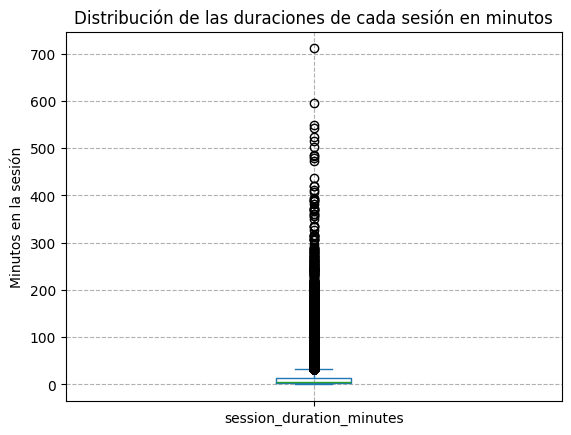

In [98]:
# Boxplot de todos los casos de duración por sesión en minutos

visits['session_duration_minutes'].plot(
    kind='box',
    ylabel='Minutos en la sesión',
    title='Distribución de las duraciones de cada sesión en minutos'
)

plt.grid(linestyle='--')
plt.show()

- Gracias a este describe y a este boxplot, nos damos cuenta que tenemos varios registros con valores atípicos, los cuales van a sesgar nuestro análisis ya que el servicio no es una plataforma en la cual un usuario deba pasar mucho tiempo, probablemente sean bugs o bien, que unas personas dejen el navegador abierto sin darse cuenta.
- Llegamos a esta idea debido a que en el describe pudimos ver que el 75% de los datos estaban antes de los 14 minutos de sesión y que se disparaba hacia el máximo de casi 12 horas. El boxplot nos ayuda a confirmar la suposición inicial.

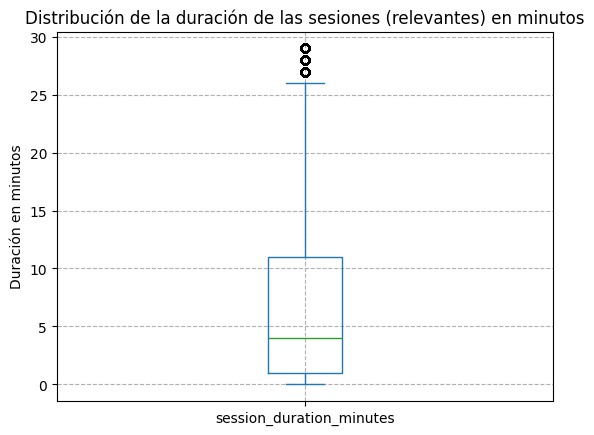

In [99]:
# Limpiar dataset quitando valores atípicos

relevant_visits = visits[visits['session_duration_minutes'] < 30] # Tomamos el valor de 30 minutos para dar un poco de margen a lo observado en el 75% de los datos.

relevant_visits['session_duration_minutes'].plot(kind='box', title='Distribución de la duración de las sesiones (relevantes) en minutos', ylabel='Duración en minutos')
plt.grid(linestyle='--')
plt.show()

In [100]:
vis_count =visits['start_ts'].count()
rel_vis_count = relevant_visits['start_ts'].count()

data_percent = rel_vis_count / vis_count * 100

print(f"Porcentaje de datos conservados: {data_percent:.2f}%")

Porcentaje de datos conservados: 91.72%


- Estamos conservando la gran mayoría de datos al quitar las sesiones mayores a 30 min, podemos ocupar esta muestra para tener un análisis más preciso referente a la duración de las visitas al sitio web.

In [101]:
# Describe del nuevo dataset

relevant_visits['session_duration_minutes'].describe()

count    329640.00000
mean          7.05617
std           7.44679
min           0.00000
25%           1.00000
50%           4.00000
75%          11.00000
max          29.00000
Name: session_duration_minutes, dtype: float64

- Este dataset nos servirá más para este análisis en particular (duracion de las sesiones), ya que contiene la mayoría de los datos de duración de visitas que nos interesan.
- La duración promedio de las sesiones está alrededor de los 7 min, parece ser un buen valor pero quizá podríamos ir considerando alguna forma de facilitar la compra de boletos y que las sesiones duren menos. Habrá que comparar estos valores junto con la cantidad de ventas que se hicieron.

In [102]:
# Frecuencia con la que regresan los usuarios

id_freq = relevant_visits.groupby('uid')['start_ts'].count()

print(id_freq.mean())

1.504092862813809


- El promedio de visitas de los usuarios es de 1.50 en todo nuestro dataset de visitas relevantes (menos de 30 min en la sesión).
- Considero que es un número bajo ya que el servicio busca que las personas quieran comprar constantemente boletos para diferentes eventos a lo largo del año.
- Por lo que estuvimos viendo anteriormente, es posible que solamente hayan ofrecido un evento importante al cual la gente quiso ir (durante el mes de noviembre de 2017) y ya, no tuvieron intenciones de regresar para otros eventos.

### Orders

- ¿Cuándo empieza la gente a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el usuario se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el usuario podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d. Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo.)
- ¿Cuántos pedidos hacen durante un período de tiempo dado?
- ¿Cuál es el tamaño promedio de compra?
- ¿Cuánto dinero traen? (LTV)

In [103]:
visits.query("uid == 3644482766749211722").sort_values('start_ts',ascending=True)

,device,end_ts,source_id,start_ts,uid,start_year,start_month,start_day,start_week,session_duration,session_duration_minutes
358711,desktop,2017-06-01 09:22:19,1,2017-06-01 09:22:00,3644482766749211722,2017,6,1,22,0 days 00:00:19,0
356089,desktop,2017-06-01 19:26:00,5,2017-06-01 18:34:00,3644482766749211722,2017,6,1,22,0 days 00:52:00,52
357542,desktop,2017-06-02 15:20:00,5,2017-06-02 14:56:00,3644482766749211722,2017,6,2,22,0 days 00:24:00,24
321385,desktop,2017-06-07 11:06:00,5,2017-06-07 11:05:00,3644482766749211722,2017,6,7,23,0 days 00:01:00,1
55638,desktop,2017-06-07 11:25:00,1,2017-06-07 11:19:00,3644482766749211722,2017,6,7,23,0 days 00:06:00,6
...,...,...,...,...,...,...,...,...,...,...,...
174758,desktop,2018-05-03 16:17:00,2,2018-05-03 16:13:00,3644482766749211722,2018,5,3,18,0 days 00:04:00,4
19700,desktop,2018-05-11 13:31:00,1,2018-05-11 13:29:00,3644482766749211722,2018,5,11,19,0 days 00:02:00,2
31902,desktop,2018-05-11 14:42:00,1,2018-05-11 14:33:00,3644482766749211722,2018,5,11,19,0 days 00:09:00,9
20647,desktop,2018-05-11 17:14:00,2,2018-05-11 17:11:00,3644482766749211722,2018,5,11,19,0 days 00:03:00,3


In [104]:
orders.query("uid == 3644482766749211722").sort_values('buy_ts', ascending=True)

,buy_ts,revenue,uid,buy_year,buy_month,buy_day
7,2017-06-01 09:22:00,1.22,3644482766749211722,2017,6,1
139,2017-06-02 12:44:00,0.85,3644482766749211722,2017,6,2
155,2017-06-02 15:08:00,12.83,3644482766749211722,2017,6,2
293,2017-06-04 13:06:00,17.11,3644482766749211722,2017,6,4
738,2017-06-07 11:06:00,7.33,3644482766749211722,2017,6,7
...,...,...,...,...,...,...
44796,2018-04-20 13:09:00,3.05,3644482766749211722,2018,4,20
45380,2018-04-24 21:04:00,4.89,3644482766749211722,2018,4,24
45647,2018-04-26 19:44:00,14.67,3644482766749211722,2018,4,26
45720,2018-04-27 12:02:00,4.89,3644482766749211722,2018,4,27


- Encontramos problemas con los datos, tenemos órdenes de compras que no tienen un tiempo de conexión donde se hubieran podido realizar. Continuaremos el análisis pero esto debería ser reportado al área encargada de recopilar los datos.

In [105]:
# Extraer dataframe de compras fiables/realistas para hacer análisis

orders_visits = visits.merge(orders, on='uid', how='left')

orders_visits = orders_visits.query("start_ts <= buy_ts <= end_ts")
orders_visits = orders_visits.query('revenue > 0') # Encontramos valores que tenían 0 de revenue en un primer ánalisis, regresamos a retirarlos para los pasos posteriores.

orders_visits

,device,end_ts,source_id,start_ts,uid,start_year,start_month,start_day,start_week,session_duration,session_duration_minutes,buy_ts,revenue,buy_year,buy_month,buy_day
45,touch,2018-02-12 20:30:00,2,2018-02-12 19:24:00,18188358787673499603,2018,2,12,7,0 days 01:06:00,66,2018-02-12 19:48:00,0.73,2018.0,2.0,12.0
72,desktop,2018-03-12 23:25:00,3,2018-03-12 23:13:00,15857957287537270437,2018,3,12,11,0 days 00:12:00,12,2018-03-12 23:17:00,1.83,2018.0,3.0,12.0
100,desktop,2017-10-03 10:30:00,1,2017-10-03 10:10:00,18169507838259737849,2017,10,3,40,0 days 00:20:00,20,2017-10-03 10:13:00,2.75,2017.0,10.0,3.0
110,desktop,2018-02-25 23:43:00,5,2018-02-25 23:35:00,9344114199116964256,2018,2,25,8,0 days 00:08:00,8,2018-02-25 23:36:00,0.98,2018.0,2.0,25.0
141,desktop,2018-04-19 17:48:00,1,2018-04-19 17:46:00,3577449367987547907,2018,4,19,16,0 days 00:02:00,2,2018-04-19 17:47:00,5.13,2018.0,4.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023804,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017,7,29,30,0 days 00:00:19,0,2017-07-29 19:07:00,1.34,2017.0,7.0,29.0
1023806,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018,1,25,4,0 days 00:00:19,0,2018-01-25 17:38:00,2.93,2018.0,1.0,25.0
1023808,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018,3,3,9,0 days 00:00:19,0,2018-03-03 10:12:00,0.61,2018.0,3.0,3.0
1023809,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017,11,2,44,0 days 00:00:19,0,2017-11-02 10:12:00,2.69,2017.0,11.0,2.0


In [106]:
# Encontrar timestamp de la primera visita de cada usuario

first_visits = visits.groupby('uid')['start_ts'].min().reset_index()

first_visits.columns = ['uid','first_visit']

first_visits

,uid,first_visit
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00
...,...,...
228164,18446403737806311543,2017-11-30 03:36:00
228165,18446424184725333426,2017-12-06 20:32:00
228166,18446556406699109058,2018-01-01 16:29:00
228167,18446621818809592527,2017-12-27 13:27:00


In [107]:
# Encontrar timestamp de la primera compra de cada usuario

first_purchase = orders_visits.groupby('uid')['buy_ts'].min().reset_index()

first_purchase.columns = ['uid','first_purchase']

first_purchase

,uid,first_purchase
0,1575281904278712,2017-06-03 10:13:00
1,2551852515556206,2017-11-24 10:14:00
2,3077748354309989,2018-03-03 12:33:00
3,3605148382144603,2017-09-21 20:56:00
4,4808417689019433,2018-01-09 23:32:00
...,...,...
29777,18442106212931715033,2018-01-06 00:35:00
29778,18442290965339407211,2018-02-05 19:39:00
29779,18445407535914413204,2017-09-22 23:55:00
29780,18445601152732270159,2018-03-26 22:54:00


In [108]:
# Merge de usuarios con primera visita y primera compra

users = orders_visits[['uid','start_ts','end_ts','buy_ts','source_id']]
users = users.merge(first_visits, on='uid')
users = users.merge(first_purchase, on='uid')

users

,uid,start_ts,end_ts,buy_ts,source_id,first_visit,first_purchase
0,18188358787673499603,2018-02-12 19:24:00,2018-02-12 20:30:00,2018-02-12 19:48:00,2,2018-02-10 12:17:00,2018-02-12 19:48:00
1,15857957287537270437,2018-03-12 23:13:00,2018-03-12 23:25:00,2018-03-12 23:17:00,3,2017-09-22 21:16:00,2018-03-12 23:17:00
2,18169507838259737849,2017-10-03 10:10:00,2017-10-03 10:30:00,2017-10-03 10:13:00,1,2017-06-15 15:10:00,2017-09-29 05:54:00
3,9344114199116964256,2018-02-25 23:35:00,2018-02-25 23:43:00,2018-02-25 23:36:00,5,2018-02-25 23:35:00,2018-02-25 23:36:00
4,3577449367987547907,2018-04-19 17:46:00,2018-04-19 17:48:00,2018-04-19 17:47:00,1,2017-06-09 10:40:00,2017-06-09 10:43:00
...,...,...,...,...,...,...,...
35881,18363291481961487539,2017-07-29 19:07:00,2017-07-29 19:07:19,2017-07-29 19:07:00,2,2017-07-29 19:07:00,2017-07-29 19:07:00
35882,18370831553019119586,2018-01-25 17:38:00,2018-01-25 17:38:19,2018-01-25 17:38:00,1,2018-01-25 17:38:00,2018-01-25 17:38:00
35883,18387297585500748294,2018-03-03 10:12:00,2018-03-03 10:12:19,2018-03-03 10:12:00,4,2018-03-03 10:12:00,2018-03-03 10:12:00
35884,18388616944624776485,2017-11-02 10:12:00,2017-11-02 10:12:19,2017-11-02 10:12:00,5,2017-11-02 10:12:00,2017-11-02 10:12:00


In [109]:
# Añadir columna del tiempo desde la primera visita para realizar la compra

users['conversion_time'] = users['first_purchase'] - users['first_visit']

users['conversion_time'].describe()

count                         35886
mean     13 days 19:02:48.170874435
std      42 days 22:29:32.529025401
min                 0 days 00:00:00
25%                 0 days 00:03:00
50%                 0 days 00:11:00
75%                 0 days 15:45:45
max               357 days 17:28:00
Name: conversion_time, dtype: object

- Parecería ser que hay datos muy sesgados en esta distribución, a partir del 50% de los mismos, los valores se disparan desde los 11 min hasta las casi 16 horas. Me gustaría explorar un poco qué pasa a partir de los 15 minutos de sesión y ver qué tantos datos tienen estos valores de gente que quizá no compró en esa primera visita, sino hasta después.

In [110]:
users[users['conversion_time'] > np.timedelta64(15, 'm')] 

,uid,start_ts,end_ts,buy_ts,source_id,first_visit,first_purchase,conversion_time
0,18188358787673499603,2018-02-12 19:24:00,2018-02-12 20:30:00,2018-02-12 19:48:00,2,2018-02-10 12:17:00,2018-02-12 19:48:00,2 days 07:31:00
1,15857957287537270437,2018-03-12 23:13:00,2018-03-12 23:25:00,2018-03-12 23:17:00,3,2017-09-22 21:16:00,2018-03-12 23:17:00,171 days 02:01:00
2,18169507838259737849,2017-10-03 10:10:00,2017-10-03 10:30:00,2017-10-03 10:13:00,1,2017-06-15 15:10:00,2017-09-29 05:54:00,105 days 14:44:00
7,12898717130063453708,2018-01-20 14:32:00,2018-01-20 15:05:00,2018-01-20 15:00:00,4,2018-01-20 14:32:00,2018-01-20 15:00:00,0 days 00:28:00
9,6209986052627151132,2018-02-25 07:19:00,2018-02-25 07:21:00,2018-02-25 07:21:00,5,2017-10-10 09:00:00,2017-10-10 09:18:00,0 days 00:18:00
...,...,...,...,...,...,...,...,...
34998,8488964331638232547,2018-03-11 14:00:00,2018-03-11 14:15:00,2018-03-11 14:10:00,3,2017-07-18 17:30:00,2018-03-11 14:10:00,235 days 20:40:00
34999,11240639067318104082,2018-01-12 10:17:00,2018-01-12 11:10:00,2018-01-12 10:23:00,9,2017-06-22 16:23:00,2017-10-24 19:30:00,124 days 03:07:00
35002,6452645078768848917,2017-12-11 12:43:00,2017-12-11 13:12:00,2017-12-11 13:02:00,2,2017-12-06 10:35:00,2017-12-11 13:02:00,5 days 02:27:00
35006,13235977275381363207,2018-01-18 18:50:00,2018-01-18 18:59:00,2018-01-18 18:56:00,2,2018-01-18 04:08:00,2018-01-18 18:56:00,0 days 14:48:00


- Viendo que aún existen muchos datos por encima de los 15 min de sesión, considero que debería seccionar estos grupos de la siguiente forma:
    - Primeros 5 min de sesión
    - Primeros 10 min de sesión
    - Primeros 30 min de sesión
    - Primera hora de sesión
    - Primer día de sesión
    - Primer semana de sesión
    - Más de una semana de sesión

In [111]:
# Extracción de cohortes por tiempo de conversión

conditions = [
    users['conversion_time'] <= np.timedelta64(5, 'm'),  
    users['conversion_time'] <= np.timedelta64(10, 'm'), 
    users['conversion_time'] <= np.timedelta64(30, 'm'),  
    users['conversion_time'] <= np.timedelta64(60, 'm'),  
    users['conversion_time'] <= np.timedelta64(1, 'D'),
    users['conversion_time'] <= np.timedelta64(7, 'D'),
    users['conversion_time'] > np.timedelta64(7, 'D')
]

labels = ['First 5 min', 'First 10 min', 'First 30 min','First hour','First day','First week','More than a week']

users['conversion_group'] = np.select(conditions, labels, default='Unknown')

users

,uid,start_ts,end_ts,buy_ts,source_id,first_visit,first_purchase,conversion_time,conversion_group
0,18188358787673499603,2018-02-12 19:24:00,2018-02-12 20:30:00,2018-02-12 19:48:00,2,2018-02-10 12:17:00,2018-02-12 19:48:00,2 days 07:31:00,First week
1,15857957287537270437,2018-03-12 23:13:00,2018-03-12 23:25:00,2018-03-12 23:17:00,3,2017-09-22 21:16:00,2018-03-12 23:17:00,171 days 02:01:00,More than a week
2,18169507838259737849,2017-10-03 10:10:00,2017-10-03 10:30:00,2017-10-03 10:13:00,1,2017-06-15 15:10:00,2017-09-29 05:54:00,105 days 14:44:00,More than a week
3,9344114199116964256,2018-02-25 23:35:00,2018-02-25 23:43:00,2018-02-25 23:36:00,5,2018-02-25 23:35:00,2018-02-25 23:36:00,0 days 00:01:00,First 5 min
4,3577449367987547907,2018-04-19 17:46:00,2018-04-19 17:48:00,2018-04-19 17:47:00,1,2017-06-09 10:40:00,2017-06-09 10:43:00,0 days 00:03:00,First 5 min
...,...,...,...,...,...,...,...,...,...
35881,18363291481961487539,2017-07-29 19:07:00,2017-07-29 19:07:19,2017-07-29 19:07:00,2,2017-07-29 19:07:00,2017-07-29 19:07:00,0 days 00:00:00,First 5 min
35882,18370831553019119586,2018-01-25 17:38:00,2018-01-25 17:38:19,2018-01-25 17:38:00,1,2018-01-25 17:38:00,2018-01-25 17:38:00,0 days 00:00:00,First 5 min
35883,18387297585500748294,2018-03-03 10:12:00,2018-03-03 10:12:19,2018-03-03 10:12:00,4,2018-03-03 10:12:00,2018-03-03 10:12:00,0 days 00:00:00,First 5 min
35884,18388616944624776485,2017-11-02 10:12:00,2017-11-02 10:12:19,2017-11-02 10:12:00,5,2017-11-02 10:12:00,2017-11-02 10:12:00,0 days 00:00:00,First 5 min


In [112]:
# Comparación de tiempos de conversión de usuarios

users_count = users['conversion_group'].value_counts()

users_count


conversion_group
First 5 min         13309
More than a week     5881
First 30 min         5634
First 10 min         4487
First week           2514
First day            2451
First hour           1610
Name: count, dtype: int64

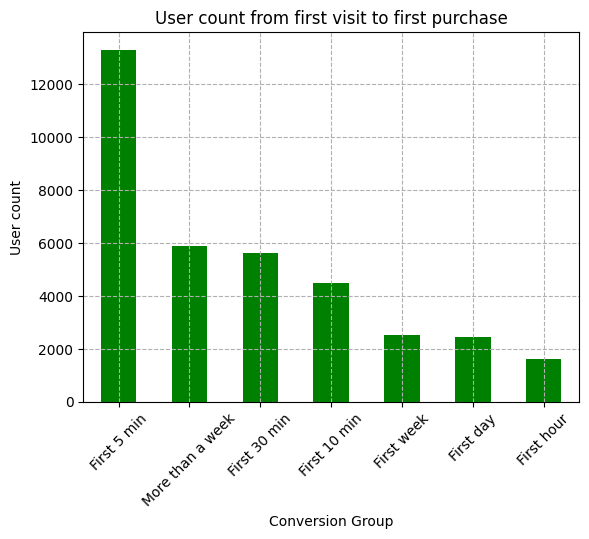

In [113]:
# Gráfica de tiempos de conversión, primera visita a primera compra

users_count.plot(kind='bar', rot=45, ylabel='User count',xlabel='Conversion Group', legend=False, color='green')

plt.grid(linestyle='--')
plt.title('User count from first visit to first purchase')
plt.show()

- Gracias a esta gráfica, podemos observar que nuestro sitio cumple con la función principal de que las personas entren únicamente a comprar para el evento que probablemente promocionamos en otras fuentes de marketing.
- Aún así, algo importante a destacar es que el siguiente grupo que encabeza la lista son de personas que compran después de 1 semana. Puede ser por varios factores; indecisión, falta de presupuesto, navegación de otros eventos en el sitio web... Hay que explorar las opciones y decidir qué nos interesa de próximas estrategias que lancemos.

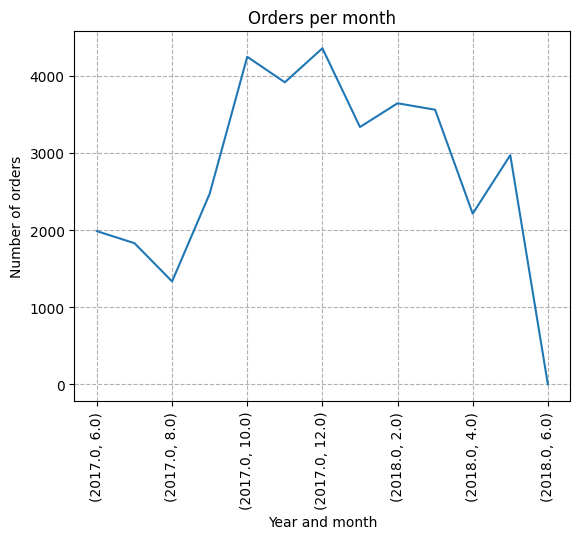

In [114]:
# Pedidos por periodo de tiempo dado, se considerará por mes

orders_per_month = orders_visits.groupby(['buy_year','buy_month'])['buy_ts'].count()

orders_per_month.plot(kind='line',
                      rot=90,
                      title='Orders per month',
                      ylabel='Number of orders',
                      xlabel='Year and month',
                      )

plt.grid(linestyle='--')
plt.show()

- Recordando el análisis de las visitas que tuvimos previamente, podemos observar que las ventas se disparan a finales del año, coincidiendo con octubre, noviembre y diciembre; mientras que antes mencionábamos que en noviembre había mucho tráfico en el sitio web.
- Seguimos con la teoría de que en noviembre existió un evento importante y la gente quiso atender a él.

In [115]:
# Tamaño promedio de compra

order_sum_per_user = orders_visits.groupby('uid')['revenue'].sum()  # Suma del revenue por usuario
order_count_per_user = orders_visits.groupby('uid')['uid'].count()  # Número de compras por usuario

order_mean_per_user = order_sum_per_user / order_count_per_user  # AOV por usuario

print(f"El tamaño de compra promedio de nuestros usuarios es: ${order_mean_per_user.mean():.2f}")


El tamaño de compra promedio de nuestros usuarios es: $4.08


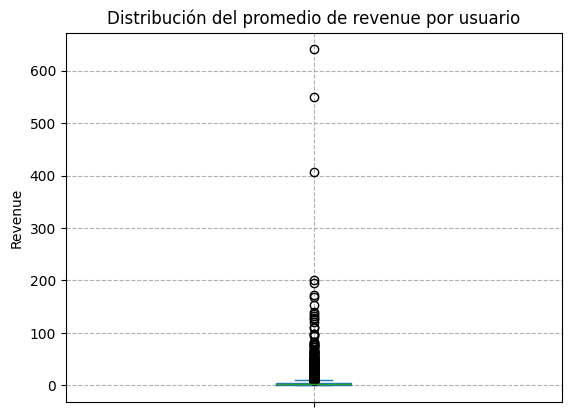

In [116]:
order_mean_per_user.plot(kind='box', title='Distribución del promedio de revenue por usuario', ylabel='Revenue')

plt.grid(linestyle='--')
plt.show()

- Encontramos valores bastante sesgados, el promedio de ventas parece ser de 4 pero tenemos muchos valores atípicos. Dependiendo qué enfoque quieran que tenga el análisis, tendríamos que tomar una decisión respecto a qué valores nos interesan para cualquier estrategia posterior.

In [117]:
# Encontrar la fecha del primer pedido de cada usuario (normalizado)

first_orders = orders_visits.groupby('uid')['buy_ts'].min().reset_index()

first_orders['buy_ts'] = first_orders['buy_ts'].dt.normalize()
first_orders['buy_ts'] = first_orders['buy_ts'].dt.to_period('M').dt.to_timestamp()

first_orders.columns = ['uid','first_buy_year_month']

first_orders

,uid,first_buy_year_month
0,1575281904278712,2017-06-01
1,2551852515556206,2017-11-01
2,3077748354309989,2018-03-01
3,3605148382144603,2017-09-01
4,4808417689019433,2018-01-01
...,...,...
29777,18442106212931715033,2018-01-01
29778,18442290965339407211,2018-02-01
29779,18445407535914413204,2017-09-01
29780,18445601152732270159,2018-03-01


In [118]:
# Tamaño de las cohortes

cohort_sizes = first_orders.groupby('first_buy_year_month')['uid'].nunique().reset_index()

cohort_sizes

,first_buy_year_month,uid
0,2017-06-01,1813
1,2017-07-01,1627
2,2017-08-01,1145
3,2017-09-01,2123
4,2017-10-01,3624
5,2017-11-01,3257
6,2017-12-01,3555
7,2018-01-01,2736
8,2018-02-01,2942
9,2018-03-01,2817


In [119]:
# Sacar el revenue de cada cohort y de cada mes

orders_visits = orders_visits.merge(first_orders, on='uid',how='left')

orders_visits['order_year_month'] = orders_visits['buy_ts'].dt.normalize()
orders_visits['order_year_month'] = orders_visits['order_year_month'].dt.to_period('M').dt.to_timestamp()

revenue_per_cohort_per_month = orders_visits.groupby(['first_buy_year_month','order_year_month'])['revenue'].sum().reset_index()

revenue_per_cohort_per_month

,first_buy_year_month,order_year_month,revenue
0,2017-06-01,2017-06-01,7813.96
1,2017-06-01,2017-07-01,323.66
2,2017-06-01,2017-08-01,346.71
3,2017-06-01,2017-09-01,667.19
4,2017-06-01,2017-10-01,599.40
...,...,...,...
74,2018-03-01,2018-05-01,383.05
75,2018-04-01,2018-04-01,7672.73
76,2018-04-01,2018-05-01,746.33
77,2018-05-01,2018-05-01,10354.18


In [120]:
# Revenue de cada cohort

revenue_per_cohort = orders_visits.groupby(['first_buy_year_month'])['revenue'].sum().reset_index()
revenue_per_cohort

,first_buy_year_month,revenue
0,2017-06-01,13679.18
1,2017-07-01,11002.94
2,2017-08-01,6975.71
3,2017-09-01,20061.19
4,2017-10-01,19828.79
5,2017-11-01,17291.13
6,2017-12-01,22118.82
7,2018-01-01,12193.86
8,2018-02-01,11994.43
9,2018-03-01,13223.22


In [121]:
# Merge de las cohortes y sus meses con el tamaño de cada cohorte

cohort_revenue_sizes = revenue_per_cohort_per_month.merge(cohort_sizes, on='first_buy_year_month')
cohort_revenue_sizes

,first_buy_year_month,order_year_month,revenue,uid
0,2017-06-01,2017-06-01,7813.96,1813
1,2017-06-01,2017-07-01,323.66,1813
2,2017-06-01,2017-08-01,346.71,1813
3,2017-06-01,2017-09-01,667.19,1813
4,2017-06-01,2017-10-01,599.40,1813
...,...,...,...,...
74,2018-03-01,2018-05-01,383.05,2817
75,2018-04-01,2018-04-01,7672.73,1778
76,2018-04-01,2018-05-01,746.33,1778
77,2018-05-01,2018-05-01,10354.18,2364


In [122]:
# LTV

cohort_revenue_sizes['ltv'] = cohort_revenue_sizes['revenue'] / cohort_revenue_sizes['uid']
cohort_revenue_sizes['age'] = (
    (cohort_revenue_sizes['order_year_month'].dt.year - cohort_revenue_sizes['first_buy_year_month'].dt.year) * 12 +
    (cohort_revenue_sizes['order_year_month'].dt.month - cohort_revenue_sizes['first_buy_year_month'].dt.month)
)

cohort_revenue_sizes

,first_buy_year_month,order_year_month,revenue,uid,ltv,age
0,2017-06-01,2017-06-01,7813.96,1813,4.309961,0
1,2017-06-01,2017-07-01,323.66,1813,0.178522,1
2,2017-06-01,2017-08-01,346.71,1813,0.191236,2
3,2017-06-01,2017-09-01,667.19,1813,0.368003,3
4,2017-06-01,2017-10-01,599.40,1813,0.330612,4
...,...,...,...,...,...,...
74,2018-03-01,2018-05-01,383.05,2817,0.135978,2
75,2018-04-01,2018-04-01,7672.73,1778,4.315371,0
76,2018-04-01,2018-05-01,746.33,1778,0.419758,1
77,2018-05-01,2018-05-01,10354.18,2364,4.379941,0


In [123]:
# LTV report

ltv_report = cohort_revenue_sizes.pivot_table(
    index='first_buy_year_month',
    columns='age',
    values='ltv',
    aggfunc='mean'

).round(2)

ltv_report['ltv_sum'] = ltv_report.sum(axis=1)
ltv_report

age,0,1,2,3,4,5,6,7,8,9,10,11,ltv_sum
first_buy_year_month,,,,,,,,,,,,,
2017-06-01,4.31,0.18,0.19,0.37,0.33,0.33,0.58,0.24,0.25,0.40,0.29,0.07,7.54
2017-07-01,5.57,0.16,0.32,0.17,0.07,0.09,0.04,0.04,0.10,0.10,0.10,NaN,6.76
2017-08-01,4.97,0.17,0.13,0.12,0.09,0.08,0.06,0.23,0.12,0.12,NaN,NaN,6.09
2017-09-01,5.24,0.64,0.27,2.11,0.39,0.33,0.26,0.11,0.10,NaN,NaN,NaN,9.45
2017-10-01,4.74,0.29,0.09,0.07,0.06,0.14,0.03,0.05,NaN,NaN,NaN,NaN,5.47
2017-11-01,4.68,0.21,0.12,0.12,0.05,0.02,0.10,NaN,NaN,NaN,NaN,NaN,5.30
2017-12-01,4.55,0.22,0.51,0.81,0.06,0.07,NaN,NaN,NaN,NaN,NaN,NaN,6.22
2018-01-01,3.91,0.22,0.17,0.13,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.46
2018-02-01,3.91,0.11,0.04,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.08


- Gracias al reporte anterior, seguimos confirmando la teoría de que los usuarios solamente ingresan a nuestra plataforma una vez, con la intención de adquirir boletos para un evento y ya pocos son los que regresan a comprar después

In [124]:
ltv_cumsum_report = ltv_report.cumsum(axis=1).round(2).fillna('')

ltv_cumsum_report

age,0,1,2,3,4,5,6,7,8,9,10,11,ltv_sum
first_buy_year_month,,,,,,,,,,,,,
2017-06-01,4.31,4.49,4.68,5.05,5.38,5.71,6.29,6.53,6.78,7.18,7.47,7.54,15.08
2017-07-01,5.57,5.73,6.05,6.22,6.29,6.38,6.42,6.46,6.56,6.66,6.76,,13.52
2017-08-01,4.97,5.14,5.27,5.39,5.48,5.56,5.62,5.85,5.97,6.09,,,12.18
2017-09-01,5.24,5.88,6.15,8.26,8.65,8.98,9.24,9.35,9.45,,,,18.90
2017-10-01,4.74,5.03,5.12,5.19,5.25,5.39,5.42,5.47,,,,,10.94
2017-11-01,4.68,4.89,5.01,5.13,5.18,5.2,5.3,,,,,,10.60
2017-12-01,4.55,4.77,5.28,6.09,6.15,6.22,,,,,,,12.44
2018-01-01,3.91,4.13,4.3,4.43,4.46,,,,,,,,8.92
2018-02-01,3.91,4.02,4.06,4.08,,,,,,,,,8.16


## Costs

1. ¿Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo) 
 2. ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?
 3. ¿Cuán rentables eran las inversiones? (ROMI)    

In [125]:
# Obtener columna para tener un period

costs['dt_period'] = costs['dt'].dt.normalize()
costs['dt_period'] = costs['dt'].dt.to_period('M').dt.to_timestamp()

costs.head()

,source_id,dt,costs,year,month,day,dt_period
0,1,2017-06-01,75.20,2017,6,1,2017-06-01
1,1,2017-06-02,62.25,2017,6,2,2017-06-01
2,1,2017-06-03,36.53,2017,6,3,2017-06-01
3,1,2017-06-04,55.00,2017,6,4,2017-06-01
4,1,2017-06-05,57.08,2017,6,5,2017-06-01


In [126]:
costs_monthly = costs.groupby(['dt_period','source_id'])['costs'].sum().reset_index()

costs_monthly

,dt_period,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12
...,...,...,...
79,2018-05-01,3,9411.42
80,2018-05-01,4,4214.21
81,2018-05-01,5,3669.56
82,2018-05-01,9,362.17


In [127]:
# Dinero gastado por canal a lo largo del tiempo

costs_monthly_pivot = costs.pivot_table(
    index='source_id',
    columns='dt_period',
    values='costs',
    aggfunc='sum'

)

costs_monthly_pivot

dt_period,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
source_id,,,,,,,,,,,,
1,1125.61,1072.88,951.81,1502.01,2315.75,2445.16,2341.20,2186.18,2204.48,1893.09,1327.49,1467.61
2,2427.38,2333.11,1811.05,2985.66,4845.00,5247.68,4897.80,4157.74,4474.34,3943.14,2993.70,2689.44
3,7731.65,7674.37,6143.54,9963.55,15737.24,17025.34,16219.52,14808.78,14228.56,13080.85,9296.81,9411.42
4,3514.80,3529.73,3217.36,5192.26,6420.84,5388.82,7680.47,5832.79,5711.96,5961.87,4408.49,4214.21
5,2616.12,2998.14,2185.28,3849.14,5767.40,6325.34,5872.52,5371.52,5071.31,4529.62,3501.15,3669.56
9,285.22,302.54,248.93,415.62,609.41,683.18,657.98,547.16,551.50,480.29,373.49,362.17
10,314.22,329.82,232.57,460.67,627.24,792.36,645.86,614.35,480.88,526.41,388.25,409.86


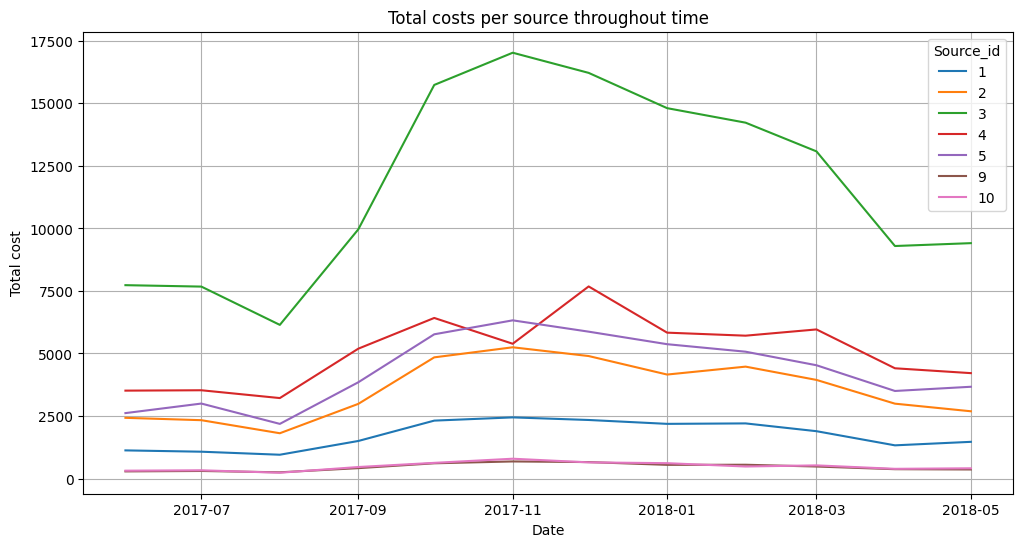

In [128]:
# Extendemos los datos para poder realizar la gráfica

costs_long = costs_monthly_pivot.reset_index().melt(id_vars='source_id', var_name='dt_period', value_name='total_cost') 

# Convertir la fecha a tipo datetime

costs_long['dt_period'] = pd.to_datetime(costs_long['dt_period'])

plt.figure(figsize=(12, 6))

for source in costs_long['source_id'].unique():
    data = costs_long[costs_long['source_id'] == source]
    plt.plot(data['dt_period'], data['total_cost'], label=source)

plt.xlabel("Date")
plt.ylabel("Total cost")
plt.title("Total costs per source throughout time")
plt.legend(title='Source_id')
plt.grid(True)
plt.show()

- Parece ser que el canal 3 fue aquél que impulsó el evento que sospechamos que ocurrió a finales del año 2017, donde obtuvimos métricas altas en general, visitas, compras...

In [129]:
# Extraer dataframe de sources con las cohortes

sources_cohorts = orders_visits.groupby(['first_buy_year_month','source_id'])['revenue'].sum().reset_index()

print(sources_cohorts)

   first_buy_year_month  source_id  revenue
0            2017-06-01          1  3543.54
1            2017-06-01          2  2557.45
2            2017-06-01          3  1877.85
3            2017-06-01          4  1921.42
4            2017-06-01          5  3309.91
..                  ...        ...      ...
81           2018-05-01          4  2154.95
82           2018-05-01          5  1977.79
83           2018-05-01          9   124.30
84           2018-05-01         10   333.77
85           2018-06-01          4     3.42

[86 rows x 3 columns]


In [130]:
ltv_report_ = ltv_report.merge(costs_monthly, left_on='first_buy_year_month', right_on='dt_period')

ltv_report_ = ltv_report_.merge(cohort_sizes, left_on='dt_period', right_on='first_buy_year_month')

ltv_report_['cac'] = ltv_report_['costs'] / ltv_report_['uid']

ltv_report_

,0,1,2,3,4,5,6,7,8,9,10,11,ltv_sum,dt_period,source_id,costs,first_buy_year_month,uid,cac
0,4.31,0.18,0.19,0.37,0.33,0.33,0.58,0.24,0.25,0.4,0.29,0.07,7.54,2017-06-01,1,1125.61,2017-06-01,1813,0.620855
1,4.31,0.18,0.19,0.37,0.33,0.33,0.58,0.24,0.25,0.4,0.29,0.07,7.54,2017-06-01,2,2427.38,2017-06-01,1813,1.338875
2,4.31,0.18,0.19,0.37,0.33,0.33,0.58,0.24,0.25,0.4,0.29,0.07,7.54,2017-06-01,3,7731.65,2017-06-01,1813,4.264562
3,4.31,0.18,0.19,0.37,0.33,0.33,0.58,0.24,0.25,0.4,0.29,0.07,7.54,2017-06-01,4,3514.80,2017-06-01,1813,1.938665
4,4.31,0.18,0.19,0.37,0.33,0.33,0.58,0.24,0.25,0.4,0.29,0.07,7.54,2017-06-01,5,2616.12,2017-06-01,1813,1.442978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,4.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.38,2018-05-01,3,9411.42,2018-05-01,2364,3.981142
80,4.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.38,2018-05-01,4,4214.21,2018-05-01,2364,1.782661
81,4.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.38,2018-05-01,5,3669.56,2018-05-01,2364,1.552267
82,4.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.38,2018-05-01,9,362.17,2018-05-01,2364,0.153202


In [131]:
romi_report = ltv_report_[['first_buy_year_month','source_id','ltv_sum','source_id','cac']]

romi_report['romi'] = romi_report['ltv_sum'] / romi_report['cac']

romi_report.sort_values(by=['first_buy_year_month', 'romi'], ascending=False)

/var/folders/d1/gxcbmjys3yb_38hqxqmhhp880000gn/T/ipykernel_11370/288927386.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  romi_report['romi'] = romi_report['ltv_sum'] / romi_report['cac']


,first_buy_year_month,source_id,ltv_sum,source_id,cac,romi
82,2018-05-01,9,4.38,9,0.153202,28.589668
83,2018-05-01,10,4.38,10,0.173376,25.263065
77,2018-05-01,1,4.38,1,0.620816,7.055226
78,2018-05-01,2,4.38,2,1.137665,3.849991
81,2018-05-01,5,4.38,5,1.552267,2.821679
...,...,...,...,...,...,...
0,2017-06-01,1,7.54,1,0.620855,12.144544
1,2017-06-01,2,7.54,2,1.338875,5.631595
4,2017-06-01,5,7.54,5,1.442978,5.225303
3,2017-06-01,4,7.54,4,1.938665,3.889274


In [132]:
df_orders_visits = orders_visits.sort_values(by='buy_ts', ascending=True)
df_orders_visits['buy_ts'] = df_orders_visits['buy_ts'].dt.normalize()

df_orders_visits = df_orders_visits.groupby(by='uid')[['buy_ts','source_id']].first().reset_index()

df_orders_visits = df_orders_visits.groupby(by=['buy_ts','source_id'])['uid'].count().reset_index()

df_orders_visits.columns = ['buy_ts_norm', 'source_id','n_users']

df_orders_visits

,buy_ts_norm,source_id,n_users
0,2017-06-01,1,16
1,2017-06-01,2,10
2,2017-06-01,3,27
3,2017-06-01,4,8
4,2017-06-01,5,13
...,...,...,...
2359,2018-05-31,4,49
2360,2018-05-31,5,33
2361,2018-05-31,9,2
2362,2018-05-31,10,23


In [133]:
# Merge de primeras compras con sus costos diarios de MKT

users_daily_combined = df_orders_visits.merge(costs, left_on=['source_id','buy_ts_norm'], right_on=['source_id','dt'])

In [134]:
# Creación de columna CAC diario

users_daily_combined['cac'] = users_daily_combined['costs'] / users_daily_combined['n_users']

In [135]:
# Obtención del CAC promedio por fuente

mean_cac_per_source = users_daily_combined.groupby('source_id')['cac'].mean().reset_index()

mean_cac_per_source


,source_id,cac
0,1,6.815515
1,2,17.866712
2,3,23.044298
3,4,9.842484
4,5,9.443504
5,9,9.713150
6,10,7.833381


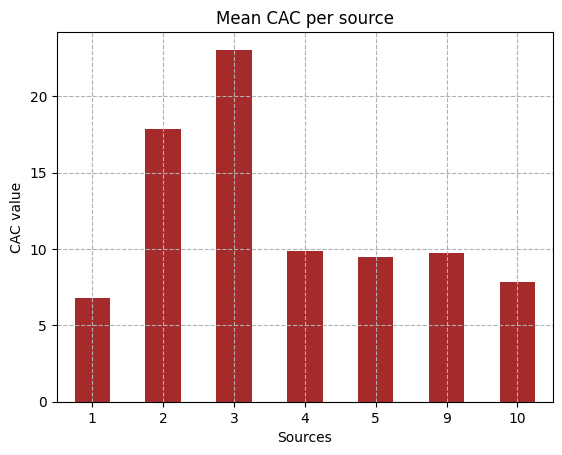

In [136]:
# Gráfico para mostrar el promedio de CAC por fuente

mean_cac_per_source.plot(kind='bar', x='source_id',y='cac', legend=False, ylabel='CAC value', xlabel='Sources',rot=0,color='brown')


plt.title('Mean CAC per source')
plt.grid(linestyle='--')
plt.show()

In [137]:
# Dataframe de costos simplificado

merge_costs = costs[['costs','dt_period']]

merge_costs

,costs,dt_period
0,75.20,2017-06-01
1,62.25,2017-06-01
2,36.53,2017-06-01
3,55.00,2017-06-01
4,57.08,2017-06-01
...,...,...
2537,9.92,2018-05-01
2538,21.26,2018-05-01
2539,11.32,2018-05-01
2540,33.15,2018-05-01


In [138]:
# Dataframe con datos de primeras fuentes de adquisición de usuarios

orders_visits2 = orders_visits.sort_values(by='order_year_month', ascending=True)

orders_visits2 = orders_visits2.groupby('uid')['source_id'].first().reset_index()

orders_visits2.columns = ['uid', 'first_source_id']

In [139]:
# Dataframe de orders simplificado y con merges

orders_visits_new = orders_visits[['source_id','uid','first_buy_year_month','order_year_month','revenue']]

orders_visits_new.columns = ['source_id', 'uid', 'cohort','order_year_month','revenue']

orders_visits_new = orders_visits_new.merge(merge_costs, right_on='dt_period', left_on='cohort', how='left') # Agregar la información de costs

orders_visits_new = orders_visits_new.merge(orders_visits2, on='uid') # Agregar la información de la (primera) fuente de adquisición para cada usuario

orders_visits_new

,source_id,uid,cohort,order_year_month,revenue,costs,dt_period,first_source_id
0,2,18188358787673499603,2018-02-01,2018-02-01,0.73,104.67,2018-02-01,2
1,2,18188358787673499603,2018-02-01,2018-02-01,0.73,78.98,2018-02-01,2
2,2,18188358787673499603,2018-02-01,2018-02-01,0.73,51.00,2018-02-01,2
3,2,18188358787673499603,2018-02-01,2018-02-01,0.73,49.93,2018-02-01,2
4,2,18188358787673499603,2018-02-01,2018-02-01,0.73,80.30,2018-02-01,2
...,...,...,...,...,...,...,...,...
7604357,2,18396128934054549559,2017-09-01,2017-09-01,1.22,23.13,2017-09-01,2
7604358,2,18396128934054549559,2017-09-01,2017-09-01,1.22,17.71,2017-09-01,2
7604359,2,18396128934054549559,2017-09-01,2017-09-01,1.22,21.96,2017-09-01,2
7604360,2,18396128934054549559,2017-09-01,2017-09-01,1.22,20.79,2017-09-01,2


/var/folders/d1/gxcbmjys3yb_38hqxqmhhp880000gn/T/ipykernel_11370/2282377875.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_source['age'] = (df_source['order_year_month'].dt.year - df_source['cohort'].dt.year) * 12 + (df_source['order_year_month'].dt.month - df_source['cohort'].dt.month)


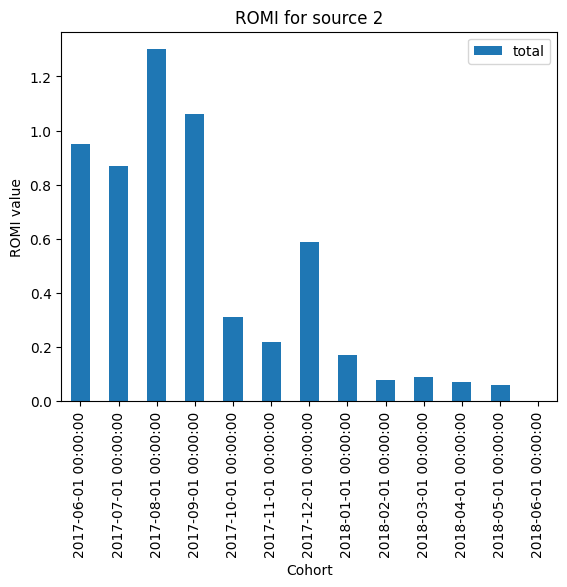

/var/folders/d1/gxcbmjys3yb_38hqxqmhhp880000gn/T/ipykernel_11370/2282377875.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_source['age'] = (df_source['order_year_month'].dt.year - df_source['cohort'].dt.year) * 12 + (df_source['order_year_month'].dt.month - df_source['cohort'].dt.month)


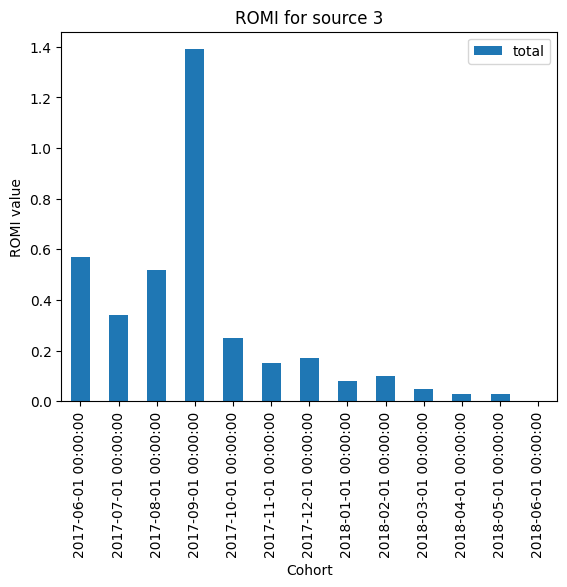

/var/folders/d1/gxcbmjys3yb_38hqxqmhhp880000gn/T/ipykernel_11370/2282377875.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_source['age'] = (df_source['order_year_month'].dt.year - df_source['cohort'].dt.year) * 12 + (df_source['order_year_month'].dt.month - df_source['cohort'].dt.month)


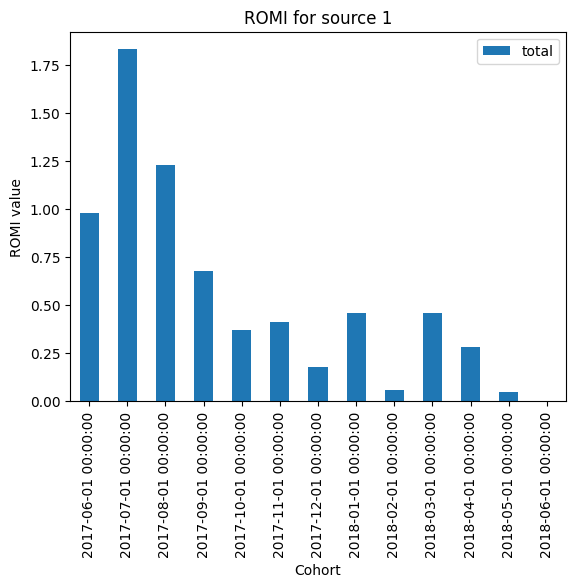

/var/folders/d1/gxcbmjys3yb_38hqxqmhhp880000gn/T/ipykernel_11370/2282377875.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_source['age'] = (df_source['order_year_month'].dt.year - df_source['cohort'].dt.year) * 12 + (df_source['order_year_month'].dt.month - df_source['cohort'].dt.month)


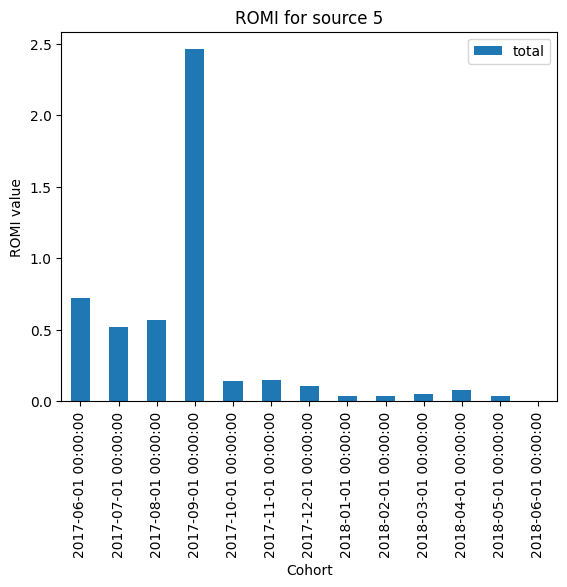

/var/folders/d1/gxcbmjys3yb_38hqxqmhhp880000gn/T/ipykernel_11370/2282377875.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_source['age'] = (df_source['order_year_month'].dt.year - df_source['cohort'].dt.year) * 12 + (df_source['order_year_month'].dt.month - df_source['cohort'].dt.month)


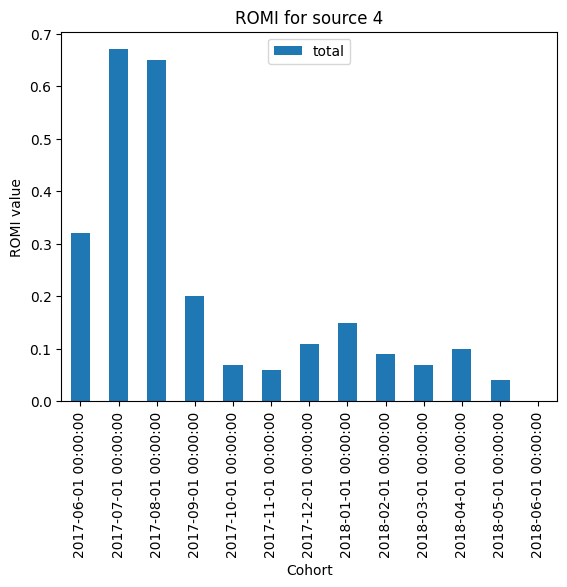

/var/folders/d1/gxcbmjys3yb_38hqxqmhhp880000gn/T/ipykernel_11370/2282377875.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_source['age'] = (df_source['order_year_month'].dt.year - df_source['cohort'].dt.year) * 12 + (df_source['order_year_month'].dt.month - df_source['cohort'].dt.month)


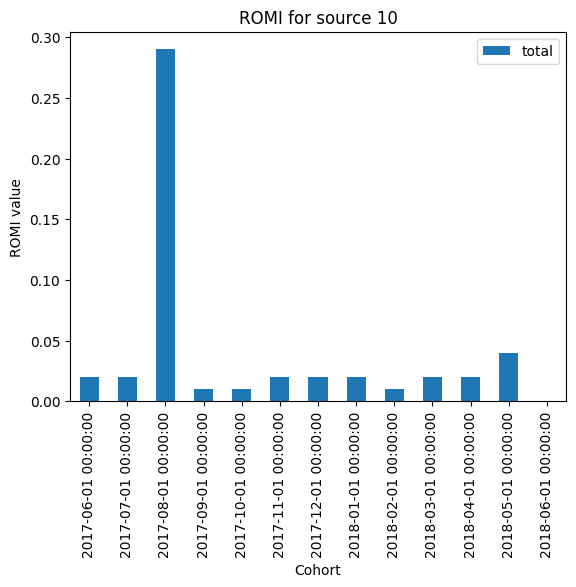

/var/folders/d1/gxcbmjys3yb_38hqxqmhhp880000gn/T/ipykernel_11370/2282377875.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_source['age'] = (df_source['order_year_month'].dt.year - df_source['cohort'].dt.year) * 12 + (df_source['order_year_month'].dt.month - df_source['cohort'].dt.month)


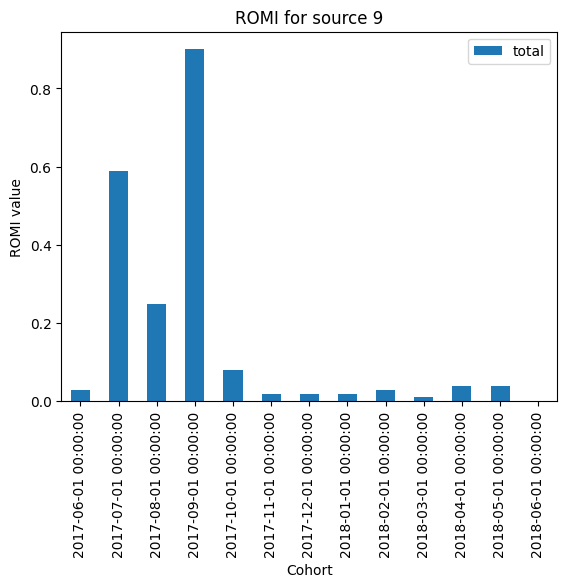

/var/folders/d1/gxcbmjys3yb_38hqxqmhhp880000gn/T/ipykernel_11370/2282377875.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_source['age'] = (df_source['order_year_month'].dt.year - df_source['cohort'].dt.year) * 12 + (df_source['order_year_month'].dt.month - df_source['cohort'].dt.month)


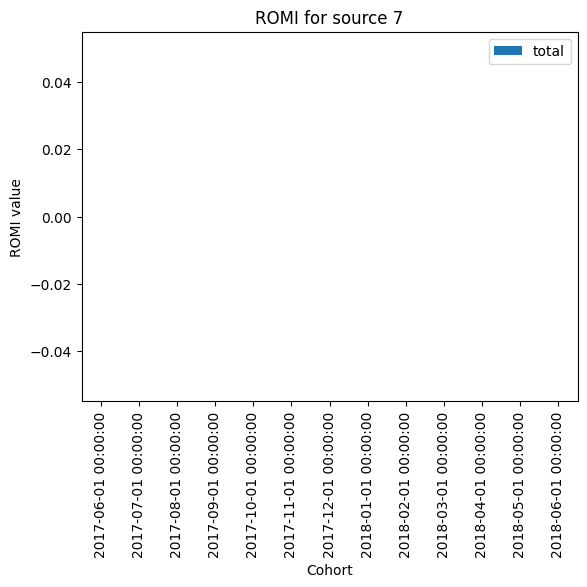

In [140]:
# Código final

for i in orders_visits_new['first_source_id'].unique():
    df_source = orders_visits_new[orders_visits_new['first_source_id'] == i] # Cambiar la columna para únicamente tomar la primera fuente de adquisición
    coh_size = orders_visits_new.groupby('cohort')['uid'].count().reset_index()
    coh_size.columns = ['cohort','n_users']

    df_source['age'] = (df_source['order_year_month'].dt.year - df_source['cohort'].dt.year) * 12 + (df_source['order_year_month'].dt.month - df_source['cohort'].dt.month)

    monthly_rev = df_source.pivot_table(
        index='cohort',
        columns='age',
        values='revenue',
        aggfunc='sum'
    ).round(2)

    coh_size = coh_size.set_index('cohort')['n_users']
    monthly_rev.index = monthly_rev.index.to_period('M').to_timestamp()
    monthly_report_ltv = monthly_rev.div(coh_size, axis=0).round(2)

    monthly_cost = df_source.pivot_table(
        index='cohort',
        columns='age',
        values='costs',
        aggfunc='sum'
    ).round(2)

    monthly_report_cac = monthly_cost.div(coh_size, axis=0)

    romi_report = (monthly_report_ltv / monthly_report_cac).round(2)
    romi_report['total'] = romi_report.sum(axis=1)
    romi_report = romi_report.reset_index()

    romi_report.plot(kind='bar', x='cohort', y='total', xlabel='Cohort', ylabel='ROMI value')
    plt.title(f"ROMI for source {i}")
    plt.show()

    '''

    ## Si quisieramos mostrar tablas pivote, debemos quitar el comentario de esta línea ##

    print("\n")
    print(f"ROMI Report for source number: {i}\n")
    print(romi_report)'
    
    '''


# Conclusiones

- Da la impresión de que los canales 2 y 1 son aquellos que mejor métrica ROMI está presentando, es decir, nos cuesta poco adquirir esos clientes y nos dejan más revenue.
- La recomendación sería que se impulsaran los canales 1 y 2 de marketing, y, como opciones alternativas, presentaríamos los canales 3  y 5, por esos picos que tuvieron en las cohortes más avanzadas en el tiempo.
- Tendríamos que explorar por qué estos canales pudieron tener un pico en una de sus cohortes para el ROMI.
- Por ello, el consejo principal sería explorar más a fondo esos canales de marketing y ver si hay forma de explotarlos aún más.
- Tendríamos que buscar qué eventos sucedieron alrededor de noviembre y por qué tuvimos mayores ventas durante ese periodo, para saber qué le gustó a nuestros clientes.
- Debemos diversificar los eventos para conseguir que los clientes vuelvan después de adquirir boletos por primera ocasión (viendo que el primer mes de cada cohorte era el más próspero)